In [182]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
#loading in the dataset using pandas
data_file = "adult.csv"
data = pd.read_csv(data_file, na_values='?')
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [184]:
#this is the shape before dropna
data.shape

(48842, 15)

In [185]:
#removes instances with missing values 
data = data.dropna()
data.shape

(45222, 15)

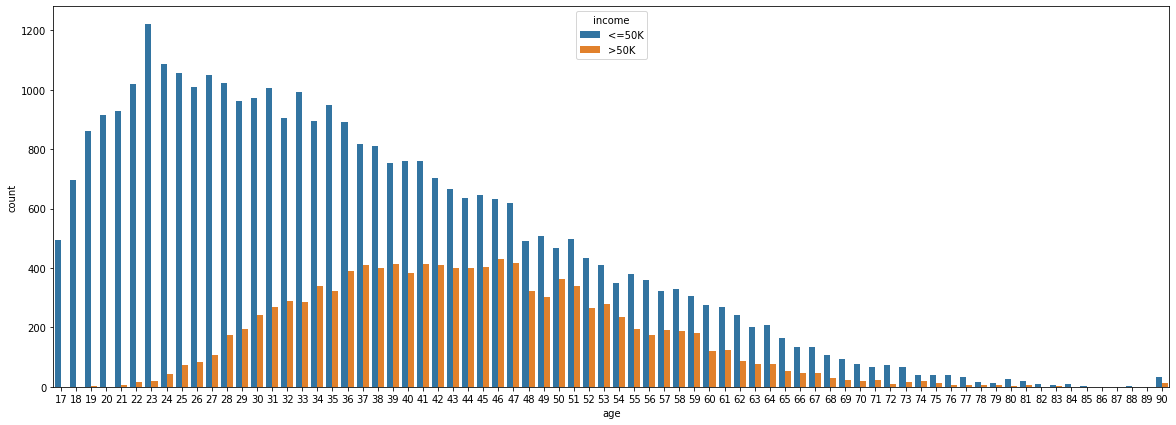

In [134]:
#Using matplotlib and seaborn
plt.figure(figsize=(20,7))
sns.countplot(x="age", hue="income",
            data=data);

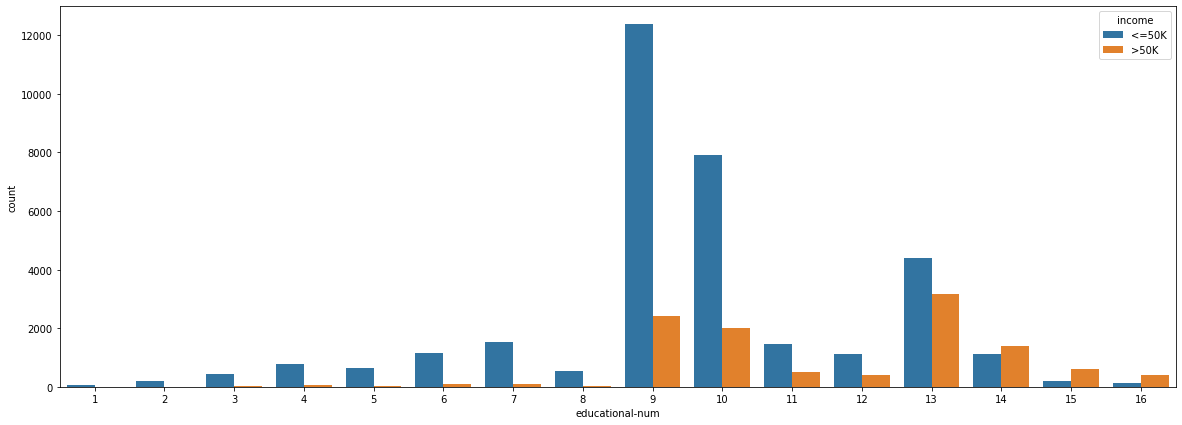

In [178]:
#Using matplotlib and seaborn
plt.figure(figsize=(20,7))
sns.countplot(x="educational-num", hue="income",
            data=data);

In [139]:
#a subset of the dataset only containing education and income columns
educationData = data[['education', 'income' ]]

In [140]:
educationData.head(10)

,education,income
0,11th,<=50K
1,HS-grad,<=50K
2,Assoc-acdm,>50K
3,Some-college,>50K
5,10th,<=50K
7,Prof-school,>50K
8,Some-college,<=50K
9,7th-8th,<=50K
10,HS-grad,>50K
11,Bachelors,<=50K


In [141]:
educationData['education'].value_counts()

HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education, dtype: int64

In [142]:
# adding a new column to represent income >50K with 1 and <=50K with 0
educationData['NUM_CATEGORY']=educationData.income.map({'<=50K':0,'>50K':1})
educationData.head()

/Users/bilal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,education,income,NUM_CATEGORY
0,11th,<=50K,0
1,HS-grad,<=50K,0
2,Assoc-acdm,>50K,1
3,Some-college,>50K,1
5,10th,<=50K,0


In [143]:
#75% training and 25% testing is the default 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(educationData.education, educationData.NUM_CATEGORY, 
                                                    random_state=50)


In [144]:
#Turnining text into vectors 
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer() 
X_train = vect.fit_transform(x_train)
X_test = vect.transform(x_test)

In [145]:
#Logistic Regression
classifier1 = LogisticRegression()
classifier1.fit(X_train,y_train) #training the classifier
result1 = classifier1.predict(X_test) #giving testing data to predict their categories 


/Users/bilal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of the Logistic Regression model:  77.42791438174422 %
              precision    recall  f1-score   support

     <=50K-0       0.79      0.96      0.86      8518
      >50K-1       0.62      0.21      0.32      2788

    accuracy                           0.77     11306
   macro avg       0.71      0.59      0.59     11306
weighted avg       0.75      0.77      0.73     11306



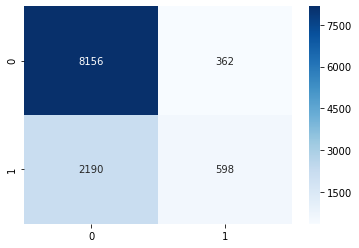

In [146]:
#Results for Logistic Regression
accuracy2 =  accuracy_score(result1,y_test)
print("Accuracy of the Logistic Regression model: ",accuracy2*100,"%")
cm2 = confusion_matrix(y_test, result1)

sns.heatmap(cm2, annot=True,cmap='Blues', fmt='g')

target_names = ['<=50K-0', '>50K-1']
print(classification_report(y_test, result1, target_names=target_names))

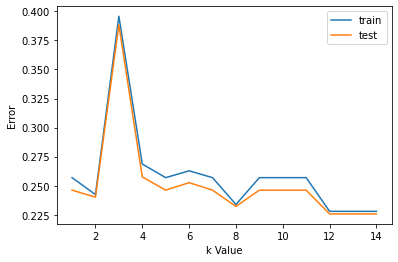

In [171]:
#This code is taken from the link below, it helps with finding the best value of K
#URL: https://www.analyticsvidhya.com/blog/2021/04/simple-understanding-and-implementation-of-knn-algorithm/
error1= []
error2= []
for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    error2.append(np.mean(y_test!= y_pred2))
# plt.figure(figsize(10,5))
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

In [174]:
#K-NN
classifier2 = KNeighborsClassifier(n_neighbors=8)
classifier2.fit(X_train,y_train) #training the classifier
result2 = classifier2.predict(X_test) #giving testing data to predict their categories 

Accuracy of the KNN model:  76.78223951883956 %
              precision    recall  f1-score   support

     <=50K-0       0.77      0.99      0.87      8518
      >50K-1       0.75      0.09      0.16      2788

    accuracy                           0.77     11306
   macro avg       0.76      0.54      0.51     11306
weighted avg       0.76      0.77      0.69     11306



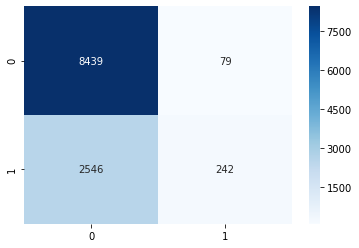

In [181]:
#Results for K-NN
accuracy2 =  accuracy_score(result2,y_test)
print("Accuracy of the KNN model: ",accuracy2*100,"%")
cm2 = confusion_matrix(y_test, result2)

sns.heatmap(cm2, annot=True,cmap='Blues', fmt='g')

target_names = ['<=50K-0', '>50K-1']
print(classification_report(y_test, result2, target_names=target_names))

In [111]:
#Functions for predicting and returning the prediction made by the models for user input
def predict_category_num_lr(text):
    test2 = vect.transform(text)
    predicted2 = classifier1.predict(test2)
    return predicted2

def predict_category_num_knn(text):
    test2 = vect.transform(text)
    predicted2 = classifier2.predict(test2)
    return predicted2

def get_category(predicted3):
    if predicted3  == 0:
         return '<=50K'
    elif predicted3 == 1:
        return '>50K'
    else:
        return 'no class found'

In [116]:
#Run to predict pay based on education
print("Type your Education: ")
userText = input()

predicted_lr = predict_category_num_lr([userText])
predicted_knn = predict_category_num_knn([userText])

category_lr = get_category(predicted_lr)
category_knn = get_category(predicted_knn)

print("Using Logistic Regression, the predicted income for this education is : " + category_lr)
print("Using KNN, the predicted income for this education is : " + category_knn)

Type your Education: 
Bachelors
Using Logistic Regression, the predicted income for this education is : <=50K
Using KNN, the predicted income for this education is : >50K
